# Exercise 1
## Group members:
* Antonio Feltrin
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout     # Dropout inactivate some neurons on the network
import tensorflow as tf

import matplotlib as mpl
import matplotlib.cm as cm
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

np.random.seed(12345)

# number of data
N = 4000
# size of each sample
L = 2
# box size
B = 100

In [2]:
# a nonlinear function of a 2d array x, same as in class
def f(x):
    r=0
    if x[0]>-25 and x[1]>-35 and x[0]+x[1] < 30:
        r=1
    if x[0]+x[1] > 50:
        r=1
    return r

In [3]:
# just to rescale a work with smaller numbers (optional), as in class
def simple_rescaling(z):
    return z/50

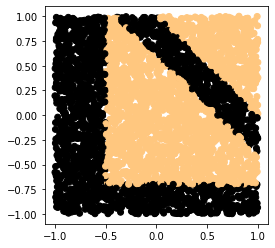

In [4]:
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)  # generate random data
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = int(f(x[i]))
    
x = simple_rescaling(x)  
plt.figure(figsize = (4,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show()

### Splitting train and test set

In [5]:
N_train = int(N*80/100)                     #take 80% of data as training
x_train, x_test = x[:N_train], x[N_train:]
y_train, y_test = y[:N_train], y[N_train:]

# 1.

In [6]:
def create_model(activation="relu"):                # model takes as input activation function; will be optimized using gridsearchCV
    model = Sequential()                            # start sequential list of layers
    model.add(Dense(L, input_shape=(L,), activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dropout(0.01))                        # the Dropout is added only to the previous layer
    model.add(Dense(1, activation='sigmoid'))       # 1 to have one single output
    return model
    
# compile model function, as in Mehta
def compile_model(optimizer="Adam", activation="relu"):   
    model = create_model(activation)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [7]:
epochs = 200
batch_size = 50

### Now let's import the libraries for the GridSearch, use KerasClassifier to see the model with the sklearn libraries and do the GridSearch.

In [8]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier to avoid DeprecationWarning from TensorFlow

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=1)

# We decided to use also another activation function, imported from tensorflow
leaky_relu = tf.nn.leaky_relu

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['RMSprop', 'Adam', 'Adamax', 'Nadam']      
activation = [leaky_relu, 'relu', 'elu', 'softmax']   
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation=activation)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train)

Epoch 1/200


C:\Users\Studente\AppData\Local\Temp\ipykernel_8252\4014416532.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


39/39 [==============================] - 1s 5ms/step - loss: 0.6351 - accuracy: 0.6776 - val_loss: 0.5935 - val_accuracy: 0.7292
Epoch 2/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7042 - val_loss: 0.5702 - val_accuracy: 0.7458
Epoch 3/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5829 - accuracy: 0.7234 - val_loss: 0.5525 - val_accuracy: 0.7563
Epoch 4/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5673 - accuracy: 0.7432 - val_loss: 0.5356 - val_accuracy: 0.7708
Epoch 5/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5498 - accuracy: 0.7563 - val_loss: 0.5152 - val_accuracy: 0.7750
Epoch 6/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7630 - val_loss: 0.4960 - val_accuracy: 0.7937
Epoch 7/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7823 - val_loss: 0.4719 - val_accuracy: 0.8104
Epoch 8/200
39/39 [======

In [9]:
grid_result.cv_results_

{'mean_fit_time': array([11.63382894, 11.70281613, 11.62740993, 12.4018656 , 12.15802014,
        12.15730435, 12.28400654, 12.97116774, 12.4948619 , 12.88710952,
        12.92840201, 13.27679449, 12.96370083, 12.94967848, 12.91491568,
        13.46800834]),
 'std_fit_time': array([0.36962274, 0.11151945, 0.03557986, 0.18492781, 0.13585913,
        0.13123334, 0.05725288, 0.03092954, 0.06224275, 0.24500425,
        0.24795023, 0.06961429, 0.12706063, 0.0872716 , 0.14235674,
        0.18686032]),
 'mean_score_time': array([0.04237247, 0.06855565, 0.04274428, 0.04311693, 0.04464996,
        0.04375046, 0.04399997, 0.04586154, 0.04700124, 0.04649973,
        0.04896021, 0.04810411, 0.04463935, 0.04878008, 0.04586595,
        0.04536223]),
 'std_score_time': array([0.00056408, 0.04547794, 0.00035866, 0.00065655, 0.00040847,
        0.00070023, 0.00070672, 0.00253879, 0.00187168, 0.00149933,
        0.00525828, 0.00488855, 0.00084121, 0.00509004, 0.0025599 ,
        0.000423  ]),
 'param_ac

In [10]:
# summarize results, as in Mehta
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.987188 using {'activation': 'elu', 'optimizer': 'Nadam'}
0.969375 (0.010807) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'RMSprop'}
0.984375 (0.005625) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'Adam'}
0.926875 (0.046524) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'Adamax'}
0.980937 (0.011605) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'Nadam'}
0.902188 (0.050081) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.897500 (0.044106) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.867500 (0.007856) with: {'activation': 'relu', 'optimizer': 'Adamax'}
0.887500 (0.051916) with: {'activation': 'relu', 'optimizer': 'Nadam'}
0.950000 (0.041599) with: {'activation': 'elu', 'optimizer': 'RMSprop'}
0.969688 (0.009535) with: {'activation': 'elu', 'optimizer': 'Adam'}
0.874063 (0.030018) with: {'activation': 'elu', 'optimizer': 'Adamax'}
0.9

In [11]:
best_fit = grid_result.best_estimator_.model.history.history
best_params = grid_result.best_params_

In [12]:
best_model_score = grid_result.best_estimator_.score(x_test, y_test)

16/16 [==============================] - 0s 733us/step - loss: 0.0344 - accuracy: 0.9875


In [13]:
best_model = grid_result.best_estimator_
# This is the best model we have found and that we will use in the following points

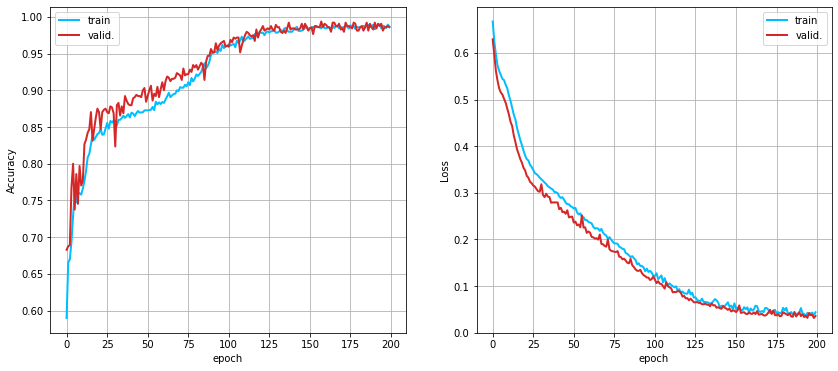

In [14]:
# As in class:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(best_fit['accuracy'], label="train", c="deepskyblue", lw=2)
ax.plot(best_fit['val_accuracy'], label="valid.", c="tab:red", lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid()
ax=AX[1]
ax.plot(best_fit['loss'], label="train", c="deepskyblue", lw=2)
ax.plot(best_fit['val_loss'], label="valid.", c="tab:red", lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid()
plt.show()

In [15]:
# As in class:
dX = 2/50
X1 = np.arange(-1,1+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

pred = best_model.predict(grid)

51 2601
[1. 1.]
82/82 [==============================] - 0s 554us/step


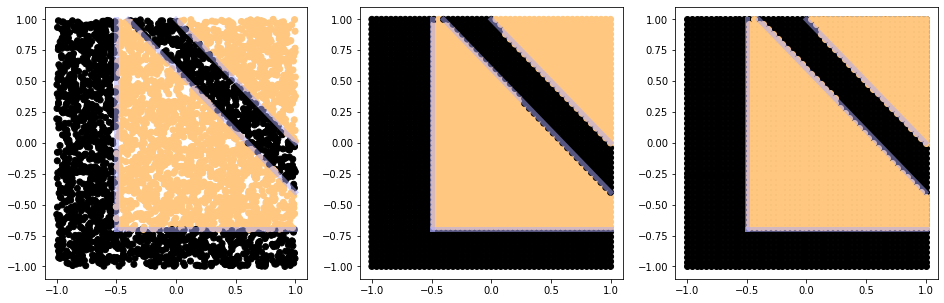

In [16]:
# As in class:
def boundaries():  
    x1=-0.5
    y1=-35/50
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((1,-2/5),(-2/5,1),c=c,alpha=a,lw=lw)
    ax.plot((1,0),(0,1),c=c,alpha=a,lw=lw)
    ax.plot((x1,1),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,1),c=c,alpha=a,lw=lw)
    
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1], c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1], c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
plt.show()

# 2.

## a) & b)
#### We decide to loop through some different values of N in order to work with a reduced and increased dataset size $N$. At each iteration in the for loop we re-set the same seed, in order to have the same initial data. 

Epoch 1/200
16/16 [==============================] - 1s 8ms/step - loss: 0.6838 - accuracy: 0.5863 - val_loss: 0.6834 - val_accuracy: 0.5250
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5775 - val_loss: 0.6797 - val_accuracy: 0.5250
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5850 - val_loss: 0.6730 - val_accuracy: 0.5400
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6162 - val_loss: 0.6613 - val_accuracy: 0.5950
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6488 - val_loss: 0.6478 - val_accuracy: 0.6250
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6812 - val_loss: 0.6341 - val_accuracy: 0.6650
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6988 - val_loss: 0.6258 - val_accuracy: 0.6950
Epoch 8/200
1

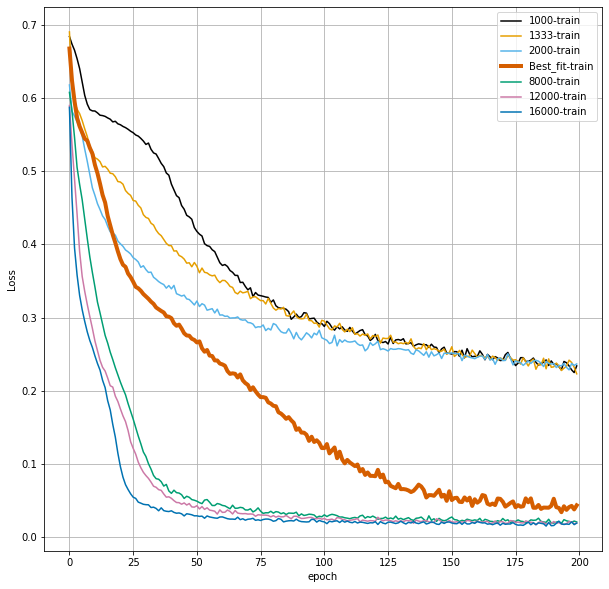

In [17]:
N_all = [N/4, N/3, N/2, N*2, N*3, N*4]
list_of_colors = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#CC79A7', '#0072B2', '#D55E00'] # '#F0E442'
plt.figure(figsize=(10,10))
for j, n in enumerate(N_all):
    np.random.seed(12345)
    n = int(n)
    x_new, y_new = (np.random.random((n, 2))-0.5)*B, np.zeros(n)
    for i in range(n):
        y_new[i] = int(f(x_new[i]))
    x_new = simple_rescaling(x_new)

    n_train = int(n*80/100) #take 80% of data as training
    x_train, x_test = x_new[:n_train], x_new[n_train:]
    y_train, y_test = y_new[:n_train], y_new[n_train:]

    model = compile_model(optimizer=best_params['optimizer'], activation=best_params['activation'])
    fit = model.fit(x_train, y_train,
                epochs=epochs, batch_size=batch_size,
                validation_data=(x_test, y_test),
                verbose=1)
    plt.plot(fit.history['loss'], label=f"{n}-train", c=list_of_colors[j])
    if n == N/2:
        plt.plot(best_fit['loss'], label="Best_fit-train", lw=4, c=list_of_colors[-1])

plt.xlabel('epoch')
plt.ylabel("Loss")
plt.grid()    
plt.legend()
plt.show()   

##### We have seen that this plot is really susceptible to the random seed initially chosen. 

## c) 
#### Our intention is now to shift the data. To do so, we make a simple assumption on the shift: if we have N points uniformly distributed in a square of dimensions B * B, the average "_occupied area_ " by each point will be $B^2/N$. We want the augmented data to be reasonably close to the original one keeping low the number of possibly wrong labels. Therefore, we generated a random gaussian noise, centered on each point of the original sample and with standard deviation $\sigma=\frac{1}{3}\sqrt{\frac{B^2}{N}}$. The factor $\frac{1}{3}$ was introduced so that the generated data falls within a distance inferior to the average distance of two neighbouring points, with a probability of $3\sigma$.

[-0.82582559  0.84375117] 0.0
[-0.52022258  0.92556304] 0.0
[-0.57619703  0.23493727] 0.0
[0.42885494 0.55375239] 0.0
[-0.65028033 -0.20742609] 0.0


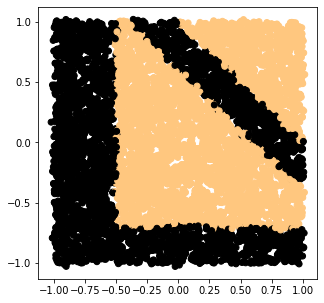

In [18]:
noise = np.zeros((N, 2))
x = (np.random.random((N, 2))-0.5)*B
Number_of_noises = 2
y = np.zeros(N)

for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = int(f(x[i]))

# we augment the data a Number_of_noises times
for _ in range(Number_of_noises):
    for i in range(noise.shape[0]):
        for j in range(noise.shape[1]):
            noise[i, j] = np.random.normal(loc=0., scale=np.sqrt(B**2/N)/3)
    x_new = x[:N] + noise
    x, y = np.concatenate((x, x_new)), np.concatenate((y, y[:N]))
x = simple_rescaling(x)

for i in range(5):
    print(x[i], y[i])

plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [19]:
# Now we train the best DNN before obtained with the augmented samples: N_augmented = 12.000 samples
# the test sets are the same as in case 1.
x_test = x[N_train:N]
y_test = y[N_train:N] 

x_train = np.concatenate((x[:N_train], x[N:]))
y_train = np.concatenate((y[:N_train], y[N:]))

Epoch 1/200
224/224 [==============================] - 1s 1ms/step - loss: 0.5805 - accuracy: 0.6979 - val_loss: 0.5342 - val_accuracy: 0.7212
Epoch 2/200
224/224 [==============================] - 0s 856us/step - loss: 0.4981 - accuracy: 0.7627 - val_loss: 0.4610 - val_accuracy: 0.7875
Epoch 3/200
224/224 [==============================] - 0s 849us/step - loss: 0.4375 - accuracy: 0.8030 - val_loss: 0.3928 - val_accuracy: 0.8512
Epoch 4/200
224/224 [==============================] - 0s 856us/step - loss: 0.3801 - accuracy: 0.8393 - val_loss: 0.3502 - val_accuracy: 0.8450
Epoch 5/200
224/224 [==============================] - 0s 848us/step - loss: 0.3519 - accuracy: 0.8453 - val_loss: 0.3305 - val_accuracy: 0.8562
Epoch 6/200
224/224 [==============================] - 0s 858us/step - loss: 0.3323 - accuracy: 0.8491 - val_loss: 0.3098 - val_accuracy: 0.8625
Epoch 7/200
224/224 [==============================] - 0s 847us/step - loss: 0.3176 - accuracy: 0.8508 - val_loss: 0.3055 - val_accu

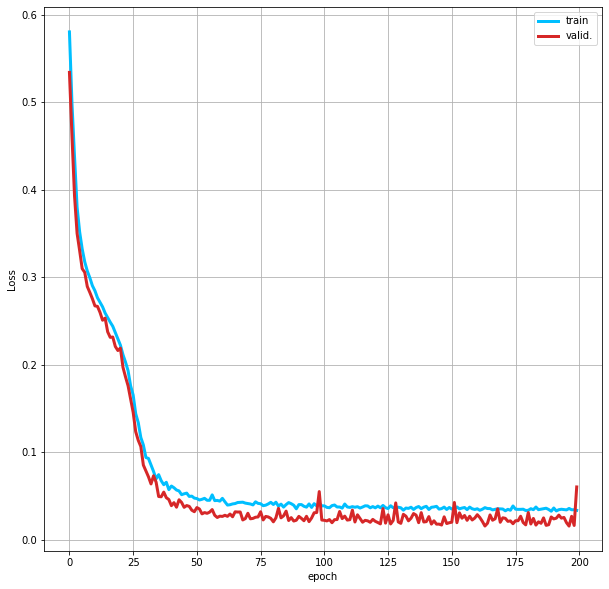

In [20]:
plt.figure(figsize=(10,10))

model = compile_model(optimizer=best_params['optimizer'], activation=best_params['activation'])
fit = model.fit(x_train, y_train,
            epochs=epochs, batch_size=batch_size,
            validation_data=(x_test, y_test),
            verbose=1)
plt.plot(fit.history['loss'], label="train", c='deepskyblue', lw=3)
plt.plot(fit.history['val_loss'], label="valid.", c='tab:red', lw=3)

plt.xlabel('epoch')
plt.ylabel("Loss")
plt.grid()    
plt.legend()
plt.show()   

In [21]:
model.evaluate(x_test, y_test);

25/25 [==============================] - 0s 750us/step - loss: 0.0602 - accuracy: 0.9737


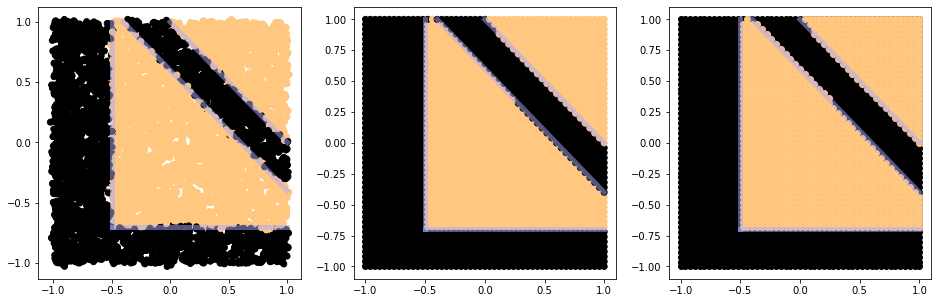

In [22]:
# As in class:
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1], c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1], c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
plt.show()

### We didn't augment the test data because we want to be sure that the test labels are correct and not affected by noise

# 3.

In [23]:
# Use of the second nonlinear function
def f(x):
    r=0
    if (np.sign(x[0]-0.2*x[1]))*np.cos(np.linalg.norm(x)/(1.5*np.pi))>0:
        r=1
    return r

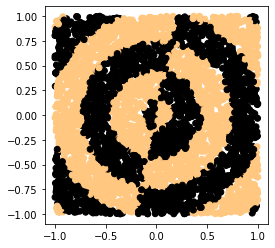

In [24]:
# As in class:
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = int(f(x[i]))
    
x = simple_rescaling(x)  
plt.figure(figsize = (4,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show()

In [25]:
x_train, x_test = x[:N_train], x[N_train:]
y_train, y_test = y[:N_train], y[N_train:]

In [26]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['RMSprop', 'Adam', 'Adamax', 'Nadam']      
activation = [leaky_relu, 'relu', 'elu', 'softmax']  
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation=activation)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train)

Epoch 1/200


C:\Users\Studente\AppData\Local\Temp\ipykernel_8252\318350891.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


39/39 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.5219 - val_loss: 0.6931 - val_accuracy: 0.5146
Epoch 2/200
39/39 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5312 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 3/200
39/39 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5406 - val_loss: 0.6927 - val_accuracy: 0.5042
Epoch 4/200
39/39 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5344 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 5/200
39/39 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5432 - val_loss: 0.6923 - val_accuracy: 0.5125
Epoch 6/200
39/39 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5474 - val_loss: 0.6927 - val_accuracy: 0.5063
Epoch 7/200
39/39 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5521 - val_loss: 0.6926 - val_accuracy: 0.5146
Epoch 8/200
39/39 [======

In [27]:
grid_result.cv_results_

{'mean_fit_time': array([11.63298726, 11.81824225, 11.85218328, 12.43528152, 12.02983856,
        12.20516342, 12.07865232, 12.70346922, 11.98465395, 12.54702544,
        12.66939926, 13.22672319, 12.8571617 , 13.0472647 , 12.69042772,
        13.46932149]),
 'std_fit_time': array([0.09499937, 0.04848487, 0.08563798, 0.14020833, 0.15034008,
        0.21386728, 0.14671876, 0.27468517, 0.03856935, 0.219974  ,
        0.0831974 , 0.21448913, 0.06563752, 0.0639917 , 0.09244729,
        0.18635101]),
 'mean_score_time': array([0.04314423, 0.04589534, 0.04373604, 0.04564089, 0.08427113,
        0.0469327 , 0.04473013, 0.04495656, 0.08446711, 0.05062139,
        0.04600739, 0.0440008 , 0.10269755, 0.04550028, 0.04897523,
        0.08875918]),
 'std_score_time': array([0.00047834, 0.00411179, 0.0014859 , 0.00374849, 0.07002842,
        0.00310694, 0.00048051, 0.00220085, 0.07105755, 0.00472661,
        0.0019919 , 0.00122529, 0.09205326, 0.00165805, 0.00420715,
        0.07407133]),
 'param_ac

In [28]:
# summarize results, as before
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


best_fit = grid_result.best_estimator_.model.history.history
best_params = grid_result.best_params_

best_model_score = grid_result.best_estimator_.score(x_test, y_test)


best_model = grid_result.best_estimator_

Best: 0.790000 using {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'Nadam'}
0.655000 (0.042472) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'RMSprop'}
0.749688 (0.038154) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'Adam'}
0.595625 (0.016117) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'Adamax'}
0.790000 (0.039320) with: {'activation': <function leaky_relu at 0x0000019FD36088B0>, 'optimizer': 'Nadam'}
0.657187 (0.028864) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.702187 (0.030521) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.599688 (0.027830) with: {'activation': 'relu', 'optimizer': 'Adamax'}
0.706250 (0.032271) with: {'activation': 'relu', 'optimizer': 'Nadam'}
0.556875 (0.006281) with: {'activation': 'elu', 'optimizer': 'RMSprop'}
0.563125 (0.030433) with: {'activation': 'elu', 'optimizer': 'Adam'}
0.546875 (0.012263) with: {'activati

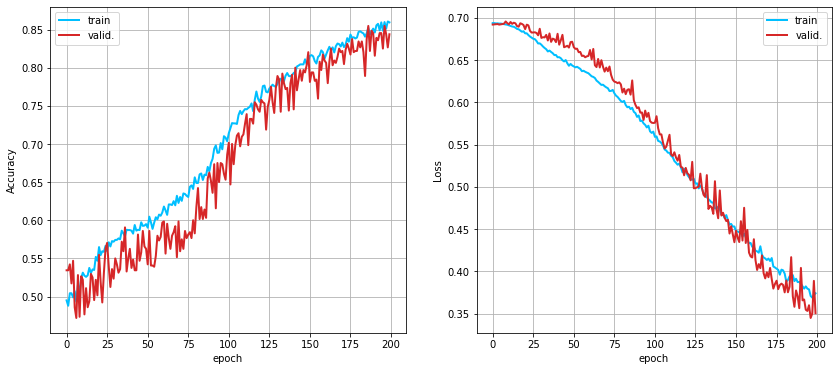

In [29]:
# As in class:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(best_fit['accuracy'], label="train", c="deepskyblue", lw=2)
ax.plot(best_fit['val_accuracy'], label="valid.", c="tab:red", lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid()
ax=AX[1]
ax.plot(best_fit['loss'], label="train", c="deepskyblue", lw=2)
ax.plot(best_fit['val_loss'], label="valid.", c="tab:red", lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid()
plt.show()

In [30]:
# As in class:
dX = 2/50
X1 = np.arange(-1,1+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

pred = best_model.predict(grid)

51 2601
[1. 1.]
82/82 [==============================] - 0s 544us/step


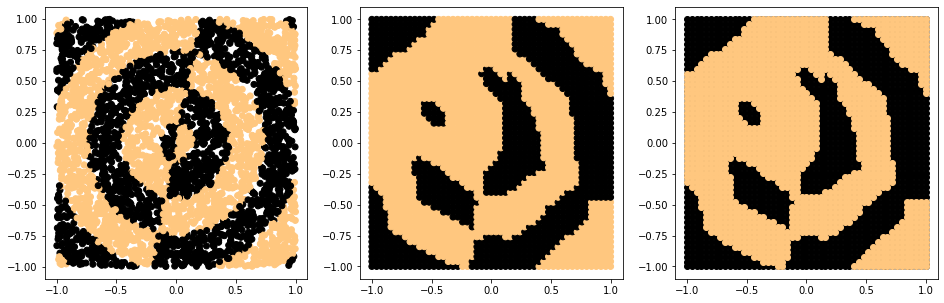

In [31]:
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1], c=y)

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1], c=pred)

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")

plt.show()

## We tried, just for fun, to modify the architecture of the best DNN now found. So we have increased the number of neurons for each layer and the number of epochs.

In [32]:
def create_model(activation="relu"):                # model takes as input activation function; will be optimized using gridsearchCV
    model = Sequential()                            # start sequential list of layers
    model.add(Dense(L, input_shape=(L,), activation=activation))
    model.add(Dense(50, activation=activation))
    model.add(Dense(50, activation=activation))
    model.add(Dense(50, activation=activation))
    model.add(Dropout(0.01))                        # the Dropout is added only to the previous layer
    model.add(Dense(1, activation='sigmoid'))       # 1 to have one single output
    return model
    
# compile model function, as in Mehta
def compile_model(optimizer="Adam", activation="relu"):   
    model = create_model(activation)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

Epoch 1/500
64/64 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5222 - val_loss: 0.6918 - val_accuracy: 0.5350
Epoch 2/500
64/64 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5353 - val_loss: 0.6925 - val_accuracy: 0.5263
Epoch 3/500
64/64 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5391 - val_loss: 0.6883 - val_accuracy: 0.5537
Epoch 4/500
64/64 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5494 - val_loss: 0.6881 - val_accuracy: 0.5550
Epoch 5/500
64/64 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5506 - val_loss: 0.6870 - val_accuracy: 0.5562
Epoch 6/500
64/64 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5500 - val_loss: 0.6830 - val_accuracy: 0.5625
Epoch 7/500
64/64 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5672 - val_loss: 0.6822 - val_accuracy: 0.5550
Epoch 8/500
6

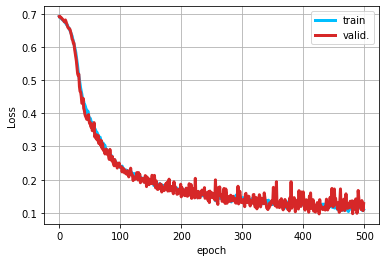

In [33]:
model = compile_model(activation=best_params['activation'], optimizer=best_params['optimizer'])
fit = model.fit(x_train, y_train,
            epochs=500, batch_size=batch_size,
            validation_data=(x_test, y_test),
            verbose=1)
plt.plot(fit.history['loss'], label="train", c='deepskyblue', lw=3)
plt.plot(fit.history['val_loss'], label="valid.", c='tab:red', lw=3)

plt.xlabel('epoch')
plt.ylabel("Loss")
plt.grid()    
plt.legend()
plt.show()   

In [34]:
# As in class:
dX = 2/50
X1 = np.arange(-1,1+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

pred = model.predict(grid)

51 2601
[1. 1.]
82/82 [==============================] - 0s 544us/step


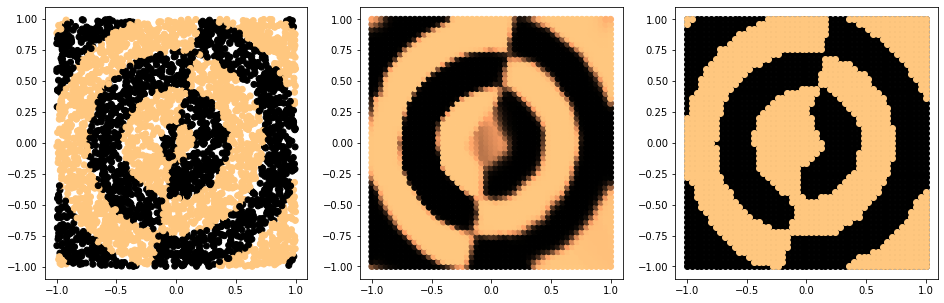

In [35]:
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1], c=y)

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1], c=pred)

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")

plt.show()

### Kind of better result as before